### `Data Description`
##### Dataset consists of customers information for a customer churn prediction production.It includes the following columns:- 

`CustomerID`:Unique identifier for each Customer.

`Name`:Name of the customer.

`Age`:Age of the customer.

`Gender`:Gender of the customer (Male or Female).

`Location`:Location where the customer is based, with options including Houston, Los Angeles, Miami, Chicago, and New york.

`Subscription_Length_Months`: The number of months the customer has been subscribed.

`Monthly bill`:Monthly bill of the customers.

`Total_Usage_gb`:Total usage in gigabytes.

`churn`: A binary indicator (0,1) representing weather the customner is churned(1) or not(0)


In [3]:
# importing required libraries
import pandas as pd 
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_excel("customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(100000, 9)

In [7]:
df.sample(8)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
28309,28310,Customer_28310,45,Male,Los Angeles,7,82.90,390,0
27718,27719,Customer_27719,18,Male,New York,23,83.81,139,0
31410,31411,Customer_31411,23,Female,Los Angeles,23,85.91,296,0
46376,46377,Customer_46377,40,Male,Houston,16,94.00,142,1
34498,34499,Customer_34499,34,Male,Miami,9,83.38,151,0
7707,7708,Customer_7708,62,Male,Houston,14,34.06,468,1
47056,47057,Customer_47057,69,Female,New York,24,47.98,466,1
60125,60126,Customer_60126,62,Female,Los Angeles,24,65.83,418,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


##### All variables have correct dtype

In [10]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

##### There is no null values in any variables

In [12]:
df.duplicated().sum()

0

##### There is no duplicate values

In [14]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### `Age`
 * ##### The average age of the customer is approximately 44 years.
 * ##### The ages of customer varies widely. The youngest people is 18 years old and the oldest person is 70 years old
 * ##### The majority of customer fall under the range of 31 year old to 57 year old
 * ##### The std of the ages is around 15 years old

### `Subscription_Length_Months`
 * ##### The average Subscription_Length_Months is approximately 12.5 months.
 * ##### subscribed lenths vary from 1 to 24 months.
 * ##### Majority of customer have subscription lenths ranging from 6 to 19 months.
 * ##### The std of the Subscription is around 6.9 months.indicating some variation in the subscription

### `Monthly_Bill`
 * ##### Customer pays the average Monthly_Bill around $65
 * ##### Monthly_Bill lenth vary from 30(minimum) to 100(maximum) dollars the most
 * ##### Most of the customers pays the Monthly_Bill ranging from 47.5 to 82.6 dollars
 * ##### Monthly_Bill	have the standard deviation of 20. showing some variability  

### `Total_Usage_GB`
 * ##### Customer average data usage is around 274Gb
 * ##### The uses varies from 50(minimum) to 500(maximum)Gb
 * ##### Most customers have total usage of data between 161 to 387
 * ##### The standard deviation of Total_Usage_GB is around 130


In [16]:
df.describe(include=["object"])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [17]:
df["Gender"].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [18]:
df["Location"].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

### `Gender`
 * ##### The dataset includes information about two unique gender
 * ##### The most common gender is female with 50216
 * ##### distribution of male and female is approximately same
### `Location`
 * ##### The dataset contain the information about ["Houston","Los_angles","Miami","Chicago","New York"]
 * ##### The most frequent location is Houstan

In [20]:
# copying the dataset
data=df.copy()
# we are removing these columns because it is Categorical variable
data=data.drop(columns=["Name","Gender","Location"],axis=1)
# checking the correlation withing the variables 
data.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


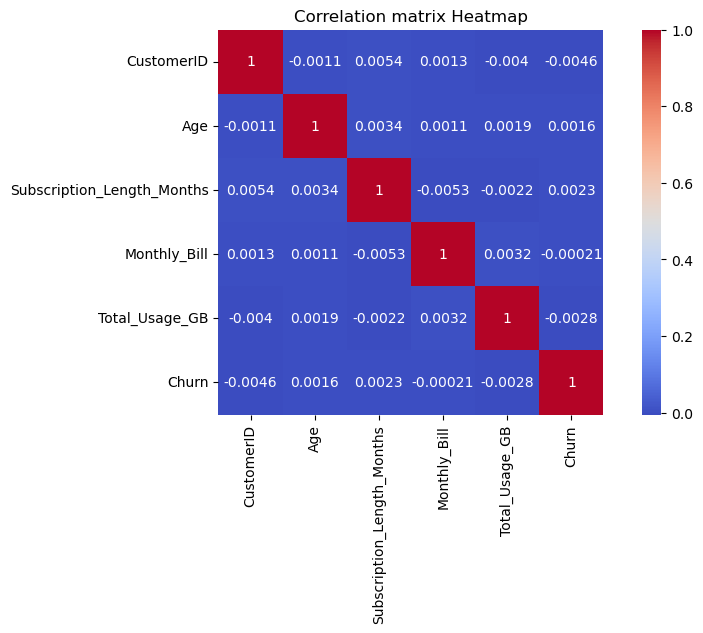

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",square=True)
plt.title("Correlation matrix Heatmap")
plt.show()

### `Age and Subscription_Length_Months`
 * ##### Age and Subscription_Length_Months is very low positive correlation of approximately 0.0032
 * ##### It indicates that there is no linear relationship between customer's age and the lenth of the subscription.It mean        customer's age does not have a stong impact on the how long they have subscribed

### `Age and Monthly_Bill`
 * ##### Age and Montly_Bill amount have extremly low positive correlation of approximately 0.0011
 * ##### There is no linear relationship between Customer's age and Montly bill.It means customer's age does not have a strong impact on the how much they pay the montly bill

### `Age and Total usage`
 * ##### Age and Total usage have low positive correlation of approximately 0.0019
 * ##### Customer's age and total usage does not have linear relationship between them.It means customer's age does not have a strong impact on how much data they use

### `Age and Churn`
 * ##### Age and churn have low positive correlation of about 0.0016
 * ##### There is no linear relationship between customer's age and there likelihood to churn. It mean customer's age is not a good predictor of wheather they will churn 

### `Subscription_Length_Months and Monthly_Bill`
 * ##### Subscription_Length_Months and Monthly_Bill have low negative correlation of about -0.053
 * ##### There is weak relationship between Subscription_Length_Months and how much they pay each month

### `Subscription_Length_Months and Total usage`
 * ##### Subscription_Length_Months and total uasge have very low negative correlation of approximately -0.022
 * ##### This suggest that changes in subscription length does not strongly associated with changes in total data uses 

### `Subscription_Length_Months and Churn`
 * ##### Subscription lenth and churn have very low positive correlation of about 0.0023
 * ##### There is no linear relationship between subscription length and total uasge.It means subscription lenth does no have strong affect on wheather the customer will churn

### `Monthly_Bill and Total_usage`
 * ##### Monthly_Bill and total usage have low positive correlation  of about 0.0032
 * ##### There is no linear relationship between Montly bill and total usage of data.It means that usage of data does not affect the Monthly_Bill

### `Monthly_Bill and churn`
 * ##### Monthly_Bill amount and churn have extremly low negative correlation of about -0.0002
 * ##### There is no linear relation between Monthly_Bill amount and customer churn.It means Montly biss amount does not have strong affect on wheather customer churn

### `Total usage and Churn`
 * ##### Total usage of data and churn have low negative correlation of approximately -0.0028
 * ##### Total usage of data have weak relationship with customer churn. the amont of data customer uses does not affect wheather customer will churn






In [23]:
df=df.drop(columns=["CustomerID","Name"],axis=1)

In [24]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

###### Removed the ["CustomerID" $ Name] because it is not relevent for Analysis

In [26]:
for columns in df.columns:
    unique=df[columns].unique()
    print(f"unique_value {columns}: {unique}")

missing_value=df.isnull().sum()
data_type = df.dtypes

print("-"*50)
print("Missing value:")
print(missing_value)
print()

print("-"*50)
print("Duplicate value")
print(df.duplicated().sum())
print()

print("-"*50)
print("Shape of dataset")
print(df.shape)
print()

print("-"*50)
print("\ndata types:")
print(df.dtypes)
print()


unique_value Age: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
unique_value Gender: ['Male' 'Female']
unique_value Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
unique_value Subscription_Length_Months: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
unique_value Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]
unique_value Total_Usage_GB: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 10

##### The dataset is cleaned and no suspicious values or datatypes have found

### Outliers Treatment

* It is important to find unusual or extreme data points, also know as outliers. Outliers can affect the model's understanding   of the data and lead to wrong predictions. By identifying and removing outliers, the models became more accurate and           reliable, and can better capture the actual petterns in the data. 

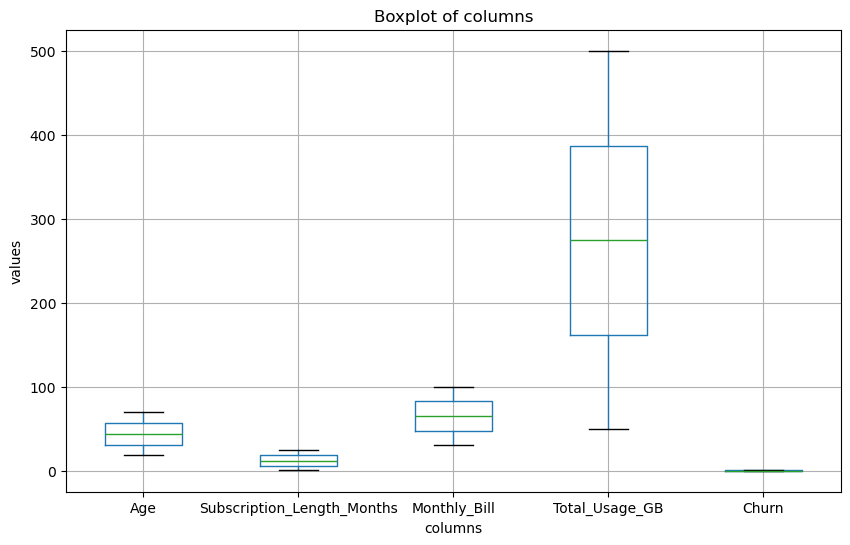

In [29]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots (figsize=(10,6))
if num_columns > 16:
    fig.set_figsize_inches=(10,num_columns*0.6)
else:
    fig.set_figsize_inches=(num_columns,6)

# create a boxplot each columns
df.boxplot(ax=ax)

# set the title and labels
plt.title("Boxplot of columns")
plt.xlabel("columns")
plt.ylabel("values")

# Show the plot
plt.show()

##### There is no outliers present in any variable in the dataset

In [31]:
# Make a copy of cleaned dataset
df_cleaned =df.copy()

### `Feature Encoding`
 * Feature encoding techniques coverts categorical data (like labels) into numbers that algorithms understand.This is             essential because algorithms work with numbers.ensuring valuable info from categories isn't lost.

In [33]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

In [34]:
df = pd.get_dummies(df,columns=["Gender","Location"],drop_first = True,dtype="int")

In [35]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


##### Here i apply One Hot Encoding because both variables have les number of categories

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  int32  
 6   Location_Houston            100000 non-null  int32  
 7   Location_Los Angeles        100000 non-null  int32  
 8   Location_Miami              100000 non-null  int32  
 9   Location_New York           100000 non-null  int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 5.7 MB


##### Data types of all variables looks fine.

### `Checking Distribution of dataset`
 * In machine learning, it is important to check how the  data is spread across the values.This is called distribution of data.

 * If the data is skewed,meaning that there are more data points in one area than others,it can affect the performance of our     model .For example,if the data is skewed toward majority class,the model might perform good in the majority class but          poorly on the minority class.
 
 * By understanding the data distribtion, we can use appropriate strategies to handle the imbalance, outliers or other issues.    This will ensure that our model works well across all scenarios and accuratly represents the underlying pattern in the         data. 

In [40]:
df.shape

(100000, 10)

In [41]:
# select appropriate bin size using sturges_rule
import math

def Sturges_rule(data_points):
    k= 1 + math.log2(data_points)
    return int(k)

data_points=100000
result=Sturges_rule(data_points)
print(f"Number of bins according to the sturges_rule :{result}")

Number of bins according to the sturges_rule :17


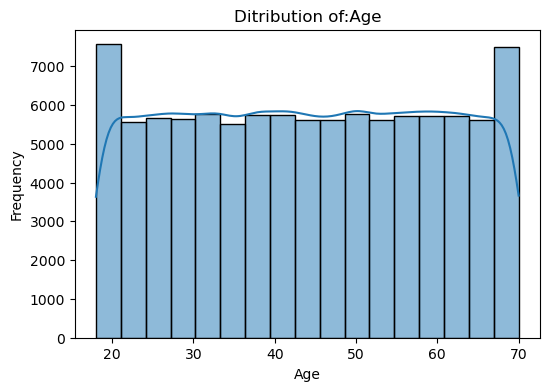

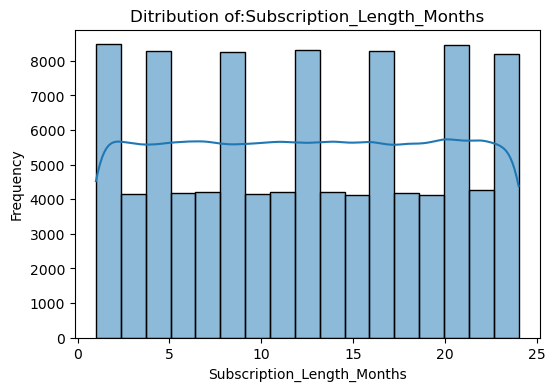

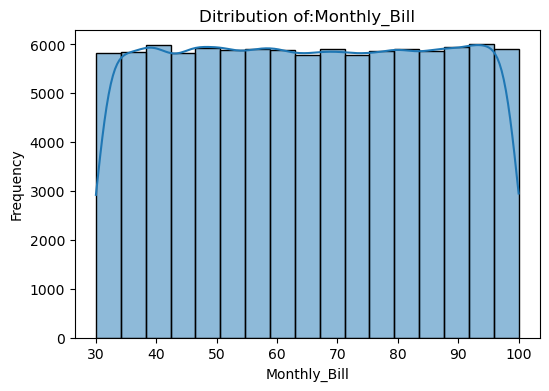

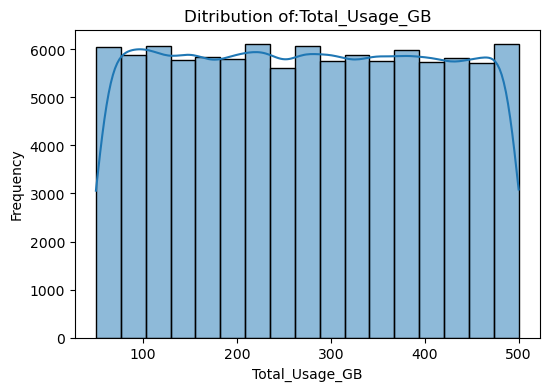

In [42]:
# Checking the distribution of all continious variable.
continuous_var =df.select_dtypes(include=["float64","int64"]).columns

# Exclude binary variables from list 
binary_var=[var for var in continuous_var if df[var].nunique()==2]

# Exclude binary variable from the continious variable
continuous_var =[var for var in continuous_var if var not in binary_var]

# plot the distribution of each continuous variable
for var in continuous_var:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df,x=var,bins=17,kde=True)
    plt.title(f"Ditribution of:{var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [43]:
# Check skewness of all continuious variable.
df[continuous_var].skew()

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64

##### All variables are approximately normally distributed

### `Check collinearity between variables`
 * In machine learning, it is important to check if there are varibles that are highly correlated with each other.If there are
   ,then we should remove one of them to improve the stability and interpretability of the model.

 * Highly correlated variables are redundant, meaning that they provide the same information. This can cause the model to give to much importance to one variable, leading to overfitting. Overfitting is when the model learns the training data too well and does not generalize well to new data.

 * By removing the highly correlated valriables,we can make the model focus on distinct and meaningful information. This makes the model more reliable and understanding. It also helps to prevent multicollinearity, which is a problem that can distort the model's predictions and insights.


<Axes: >

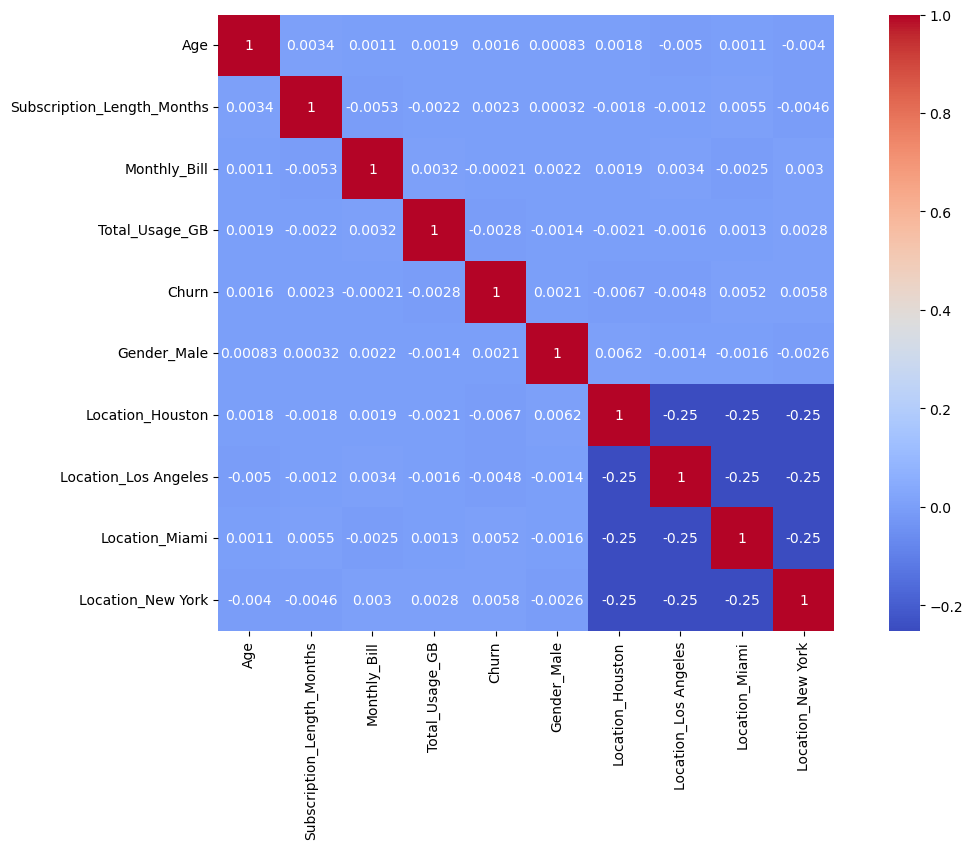

In [46]:
corr_matrix = df.corr()
plt.figure(figsize=(14,8)) 
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",square=True)

#### No pair of variable is highly correlated

### `Dividing data into train and test data.`

In [49]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)


##### Taking 70% data for the training and 30% for the testing data

In [52]:
x_train.shape,y_train.shape

((70000, 9), (70000,))

In [53]:
x_test.shape,y_test.shape

((30000, 9), (30000,))

### `Feature scaling`

 * ##### In machine learning, it is important to make sure all the features are on same scale. This is called feature scaling.

 * ##### Feature scaling is important because it esnure that no single feature dominates the learning process.This is because many machine learning algorithms use distance_based calculation, and if features are on different scale, those with larger values can disaproportionately influence the result.

 * ##### Feature scaling also help to improve the convergence of gradient-based optimisation algorithms, whic can lead to faster training.

 * ##### By scaling features, we create a balanced playing field for each feature. This allows the algorithm to make fair and accurate comparisons, which can lead to better model performance.

In [55]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [56]:
columns_to_check=df.columns
columns_need_to_be_scaled =[]

for columns in columns_to_check:
    if (df[columns]>1).any() or (df[columns]<0).any():
        columns_need_to_be_scaled.append(columns)

print("Columns with the more the 1 and less the 0")
print(columns_need_to_be_scaled)
    
    

Columns with the more the 1 and less the 0
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


##### These 4 columns need scaling, ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'], i will use MinMaxScaler.

In [58]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

Scaler= MinMaxScaler()

x_train[columns_to_scale]=Scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale]=Scaler.transform(x_test[columns_to_scale])

* We use the .fit_transform() method on training data to calculate the scaling parameters (such as mean and standard deviation) and then apply the transformation. This ensures that the training data is scaled properly.

* owever, we use the .transform() method on test data because we do not want to change the scaling parameters based on the test data. Instead, we want to apply the same scaling that was learned from the training data. This maintains the consistency of scaling between training and testing data, which is more realistic and prevents the model from learning information from the test data during training.

In [60]:
x_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
17817,0.788462,0.478261,0.579143,0.326667,0,1,0,0,0
15672,0.826923,0.347826,0.973857,0.277778,1,0,0,1,0
85675,0.846154,0.304348,0.591286,0.251111,0,0,0,0,0
46228,0.615385,0.565217,0.531429,0.900000,1,0,1,0,0
27521,0.903846,0.434783,0.716286,0.613333,0,0,0,0,0


In [61]:
x_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
20807,0.038462,0.043478,0.374000,0.508889,0,0,1,0,0
60644,1.000000,0.521739,0.316714,0.588889,1,0,1,0,0
55272,0.096154,0.130435,0.501000,0.728889,1,1,0,0,0
37867,0.826923,0.043478,0.591429,0.944444,0,0,0,0,0
85635,0.788462,0.478261,0.015857,0.513333,0,0,0,0,0


### `Check for the class imbalance`

 * ##### In machine learning, it is important to check if the data is balanced or not. This is called class imbalance.

 * ##### Class imbalance happens when there is more data points in one class then the other class.This can affect the model performance. For example, if the majority class has more data then teh minority class, then model might perform well in the majority class but poorly on the minority class.

 * ##### By identifying class imbalance, we can employ strategies to address the issue. These strategies include resampling, adjusting class weights, or using different evaluation metrics. This will help us create a fair and accurate model that performs well across all classes

   

In [63]:
class_counts = df["Churn"].value_counts()
class_counts

Churn
0    50221
1    49779
Name: count, dtype: int64

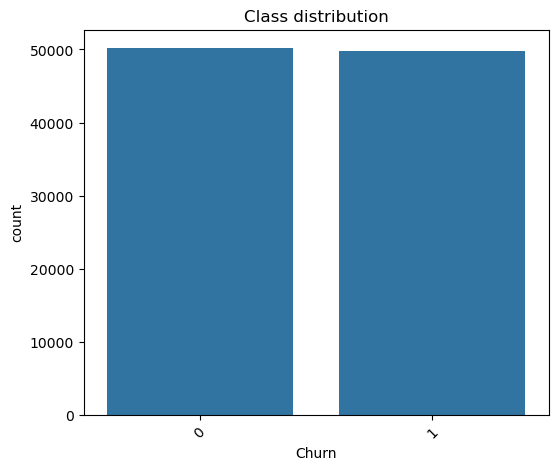

In [64]:
plt.figure(figsize=(6,5))
sns.barplot(class_counts)
plt.title("Class distribution")
plt.xlabel("Churn")
plt.xticks(rotation=45)
plt.show()

##### The churn variables are almost evenly distributed, which means that there is no problem of class imbalance.

### `Feature selection using Random forest feature importance method`

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_jobs=-1, random_state=42)

rf.fit(x_train,y_train)

importances = rf.feature_importances_

feature_importance = pd.DataFrame({"feature":x_train.columns,"importance":importances})

feature_importance = feature_importance.sort_values(by="importance",ascending = False).reset_index(drop=True)
feature_importance

,feature,importance
0,Monthly_Bill,0.316790
1,Total_Usage_GB,0.290044
2,Age,0.190150
3,Subscription_Length_Months,0.145686
4,Gender_Male,0.017873
5,Location_Los Angeles,0.010594
6,Location_Houston,0.010045
7,Location_New York,0.009642
8,Location_Miami,0.009175


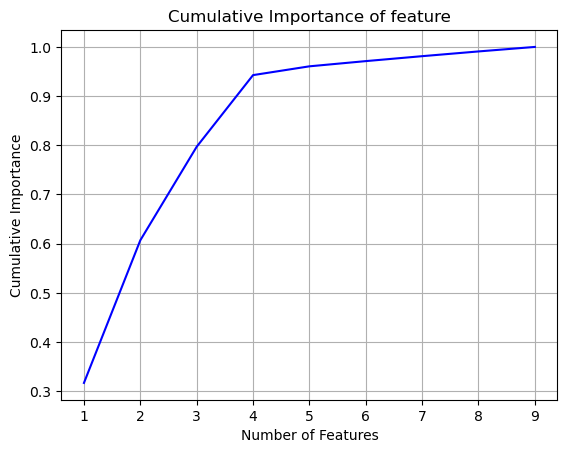

In [68]:
sorted_indices = np.argsort(importances)[::-1]
cumulative_importance=np.cumsum(importances[sorted_indices])
plt.plot(range(1,len(importances) + 1),cumulative_importance, "-b")
plt.title("Cumulative Importance of feature")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()

##### The graph shows there are 4 features which is important for our anylysis. The columns are:

* Monthly_Bill

* Total_Usage_GB

* Age

* Subscription_Length_Months

##### The 4 variable together gives about 94% of the information for the analysis.This means these 4 variables are the most important for predicting the customer churn.

##### For know i will use all the four variables for the analysis becuase there not to many variables.If the models does not perform well or overfits the i will remove these varibles.

### `Check-multicolinearity between variables`
* In machine learning, it is important to check if there are variables that are highly correlated with each other. This is called multicollinearity.

* Multicollinearity can cause problems with the model, such as making it unstable and difficult to interpret. This is because correlated variables are redundant, meaning that they provide the same information. This can cause the model to give too much importance to one variable, leading to overfitting.

*  By identifying and addressing multicollinearity, we can make the model more reliable and interpretable. This improves the model's predictive power and makes it easier to understand how the variables affect the target variable.

In [71]:
# checking multicolinearity of x_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["vif_score"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif



,Features,vif_score
0,Age,3.270032
1,Subscription_Length_Months,3.153935
2,Monthly_Bill,3.329420
3,Total_Usage_GB,3.296211
4,Gender_Male,1.878575
5,Location_Houston,1.726925
6,Location_Los Angeles,1.711828
7,Location_Miami,1.715444
8,Location_New York,1.706230


##### The training data does not contain multicollinearity because the vif score is less the 6.

### `Model Building: Machine Learning Algorithms`




In [74]:
# Importing algorithms and time.
import time
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [75]:
Algorithms=[
    LogisticRegression(n_jobs=-1,random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1,random_state=42),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    XGBClassifier(n_jobs=-1,random_state=42),
    SVC(max_iter=1000,random_state=42)]

# Initialize the result dictionary for training data.
result_train ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : [],
    "Buildtime" : []
}

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train,y_train)
    y_train_pred=algo.predict(x_train)

    accuracy=accuracy_score(y_train,y_train_pred)
    precision=precision_score(y_train,y_train_pred,average='weighted')
    recall=recall_score(y_train,y_train_pred,average='weighted')
    f1=f1_score(y_train,y_train_pred,average='weighted')

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_train["Algorithm"].append(algorithm_name)
    result_train["Accuracy"].append(accuracy)
    result_train["Fl-score"].append(f1)
    result_train["Precision"].append(precision)
    result_train["Recall"].append(recall)
    result_train["Buildtime"].append(actual_time)

df_train=pd.DataFrame(result_train)
df_train

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall,Buildtime
0,LogisticRegression,0.505471,0.502054,0.505360,0.505471,1.782693
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.190255
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,8.002371
3,GaussianNB,0.506043,0.504768,0.505948,0.506043,0.131509
4,AdaBoostClassifier,0.518343,0.515430,0.518541,0.518343,3.336277
5,GradientBoostingClassifier,0.541371,0.538508,0.542155,0.541371,10.708341
6,KNeighborsClassifier,0.687429,0.687414,0.687440,0.687429,13.982426
7,XGBClassifier,0.668614,0.668503,0.668770,0.668614,0.705149
8,SVC,0.500686,0.385031,0.497294,0.500686,33.728977


 * ##### DecisionTree,RandomForest have acheived perfect accuracy on the traning data.Suggesting potential overfitting.

 * ##### AdaBoostClassifier,GaussianNB,LogisticRegression,SVC have relatively low accuracy and F1-score.

 * ##### XGBClassifier,KNeighborsClassifier,GradientBoostingClassifier have moderate accuracy and F1-score.

 * ##### SVC is taking so much time for that i used max_iter=1000.

In [77]:
result_test ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : []
} 

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train,y_train)
    y_test_pred=algo.predict(x_test)

    accuracy=accuracy_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred,average='weighted')
    recall=recall_score(y_test,y_test_pred,average='weighted')
    f1=f1_score(y_test,y_test_pred,average='weighted')

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_test["Algorithm"].append(algorithm_name)
    result_test["Accuracy"].append(accuracy)
    result_test["Fl-score"].append(f1)
    result_test["Precision"].append(precision)
    result_test["Recall"].append(recall)

df_test=pd.DataFrame(result_test)
df_test

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall
0,LogisticRegression,0.503933,0.500416,0.503431,0.503933
1,DecisionTreeClassifier,0.501133,0.501131,0.501129,0.501133
2,RandomForestClassifier,0.498967,0.498776,0.498846,0.498967
3,GaussianNB,0.503267,0.502172,0.502970,0.503267
4,AdaBoostClassifier,0.501400,0.498361,0.500870,0.501400
5,GradientBoostingClassifier,0.501100,0.498056,0.500563,0.501100
6,KNeighborsClassifier,0.498500,0.498505,0.498515,0.498500
7,XGBClassifier,0.498033,0.497861,0.497919,0.498033
8,SVC,0.503467,0.388159,0.501064,0.503467


* ##### RandomForestClassifier,DecisionTreeClassifier overfits.

* ##### Majority of algorithms is not performing well with 50% approximately, so we will do the hyperparameter tuning.

### `Hyperparameter Tunning`

* Hyperparameter tuning helps select optimal settings that maximize accuracy, precision, or other evaluation metrics, leading to better model performance.

* Hyperparameter tuning helps balance bias and variance to avoid:

 * Overfitting: Model memorizes training data but fails on unseen data.

 * Underfitting: Model is too simple and fails to learn patterns.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
models ={
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(n_jobs=-1,random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "KNeighborsClassifier":KNeighborsClassifier(n_jobs=-1),
    "XGBClassifier":XGBClassifier(n_jobs=-1,random_state=42),
    "SVC":SVC(max_iter=1000,random_state=42)
}

param_grids = {
    "DecisionTreeClassifier":{"criterion":["gini", "entropy","log_loss"],"splitter":["best","random"],
                              "max_depth":[None,3,5,10,15,20,30,50],"min_samples_split":[2,5,10],"min_samples_leaf":[1,2,4],
                             "max_features":["sqrt","log2"]},
    "RandomForestClassifier":{"n_estimators":[200,300,400,500],"criterion":["gini", "entropy","log_loss"],
                              "max_depth":[None,3,5,10,15,20,30,50],"min_samples_split":[2,5,10],"min_samples_leaf":[1,2,4],
                             "max_features":["sqrt","log2"],"oob_score":[True]},
    "AdaBoostClassifier":{"n_estimators":[50,100,200],"learning_rate":[0.01,0.1,1.0]},
    "GradientBoostingClassifier":{"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [50, 100],"loss":["log_loss","exponential"],
                                 "criterion":["friedman_mse","squared_error"]},
    "KNeighborsClassifier":{"n_neighbors":[3,4,5,6,7],"weights":["uniform","distance"]},
    "XGBClassifier":{"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [50, 100], "max_depth": [3, 6, 9]},
    "SVC":{"C": [0.1, 1, 10], "kernel":["linear", "rbf"]}
    }
best_models = {}
for name,models in models.items():
    print(f"Running RandomizedSearchCv for {name}...")

    grid_search = RandomizedSearchCV(models,param_grids[name],cv=3,scoring="accuracy",n_jobs=-1,random_state=21)
    grid_search.fit(x_train,y_train)

    best_models[name]={
        "Best_params":grid_search.best_params_,
        "Best_score":grid_search.best_score_
    }
print("Hyperparameter tunning for each model")
for model_name, result in best_models.items():
    print(f"{model_name}: {result}")

Running RandomizedSearchCv for DecisionTreeClassifier...
Running RandomizedSearchCv for RandomForestClassifier...
Running RandomizedSearchCv for AdaBoostClassifier...


C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Running RandomizedSearchCv for GradientBoostingClassifier...
Running RandomizedSearchCv for KNeighborsClassifier...
Running RandomizedSearchCv for XGBClassifier...
Running RandomizedSearchCv for SVC...


C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyperparameter tunning for each model
DecisionTreeClassifier: {'Best_params': {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}, 'Best_score': 0.5014142667355422}
RandomForestClassifier: {'Best_params': {'oob_score': True, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy'}, 'Best_score': 0.5029000689797901}
AdaBoostClassifier: {'Best_params': {'n_estimators': 100, 'learning_rate': 0.01}, 'Best_score': 0.5042143140829475}
GradientBoostingClassifier: {'Best_params': {'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.2, 'criterion': 'squared_error'}, 'Best_score': 0.5033143404087347}
KNeighborsClassifier: {'Best_params': {'weights': 'uniform', 'n_neighbors': 3}, 'Best_score': 0.500085725306}
XGBClassifier: {'Best_params': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}, 'Best_score': 0.5039000697965131}

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [81]:
Algorithms=[
    LogisticRegression(n_jobs=-1,random_state=42),
    DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=2,min_samples_leaf=4,max_features='log2'
                           ,max_depth=10,random_state=42),
    RandomForestClassifier(oob_score=True,n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='log2',
                           max_depth=3,criterion='entropy',random_state=42),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=42),
    GradientBoostingClassifier(n_estimators=50,loss='exponential',learning_rate=0.2,criterion='squared_error',random_state=42),
    KNeighborsClassifier(weights='uniform',n_neighbors=3),
    XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42),
    SVC(kernel='linear',C=0.1,max_iter=1000,random_state=42)]

result_test ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : []
} 

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train,y_train)
    y_test_pred=algo.predict(x_test)
    
    accuracy=accuracy_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred,average='weighted')
    recall=recall_score(y_test,y_test_pred,average='weighted')
    f1=f1_score(y_test,y_test_pred,average='weighted')

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_test["Algorithm"].append(algorithm_name)
    result_test["Accuracy"].append(accuracy)
    result_test["Fl-score"].append(f1)
    result_test["Precision"].append(precision)
    result_test["Recall"].append(recall)

df_test=pd.DataFrame(result_test)
df_test

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall
0,LogisticRegression,0.503933,0.500416,0.503431,0.503933
1,DecisionTreeClassifier,0.506433,0.505864,0.506234,0.506433
2,RandomForestClassifier,0.500000,0.475583,0.498073,0.500000
3,GaussianNB,0.503267,0.502172,0.502970,0.503267
4,AdaBoostClassifier,0.503867,0.410369,0.502527,0.503867
5,GradientBoostingClassifier,0.500800,0.498768,0.500361,0.500800
6,KNeighborsClassifier,0.502400,0.502406,0.502421,0.502400
7,XGBClassifier,0.498667,0.497364,0.498300,0.498667
8,SVC,0.500267,0.498942,0.500683,0.500267


* ##### After doing the hyperparameter we are still not getting the desired output.

* ##### We will take only 4 Features in the next step.Top 4 from the feature importance.

In [83]:
# We will take 4 feature for the next step.
x_train4=x_train.drop(columns=["Gender_Male","Location_Houston","Location_Los Angeles","Location_Miami","Location_New York"])
x_test4=x_test.drop(columns=["Gender_Male","Location_Houston","Location_Los Angeles","Location_Miami","Location_New York"])

In [84]:
Algorithms=[
    LogisticRegression(n_jobs=-1,random_state=42),
    DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=2,min_samples_leaf=4,max_features='log2'
                           ,max_depth=10,random_state=42),
    RandomForestClassifier(oob_score=True,n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='log2',
                           max_depth=3,criterion='entropy',random_state=42),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=42),
    GradientBoostingClassifier(n_estimators=50,loss='exponential',learning_rate=0.2,criterion='squared_error',random_state=42),
    KNeighborsClassifier(weights='uniform',n_neighbors=3),
    XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42),
    SVC(kernel='linear',C=0.1,max_iter=1000,random_state=42)]

result_test ={
    "Algorithm": [],
    "Accuracy" : [],
    "Fl-score" : [],
    "Precision": [],
    "Recall"   : []
} 

for algo in Algorithms:
    start_time =time.time() #Start_timer

    algorithm_name=type(algo).__name__
    algo.fit(x_train4,y_train)
    y_test_pred=algo.predict(x_test4)

    accuracy=accuracy_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred,average='weighted')
    recall=recall_score(y_test,y_test_pred,average='weighted')
    f1=f1_score(y_test,y_test_pred,average='weighted')

    end_time =time.time() #End Timer
    actual_time= end_time - start_time

    result_test["Algorithm"].append(algorithm_name)
    result_test["Accuracy"].append(accuracy)
    result_test["Fl-score"].append(f1)
    result_test["Precision"].append(precision)
    result_test["Recall"].append(recall)

df_test_4=pd.DataFrame(result_test)
df_test_4

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Fl-score,Precision,Recall
0,LogisticRegression,0.500567,0.483349,0.499126,0.500567
1,DecisionTreeClassifier,0.504367,0.467907,0.503362,0.504367
2,RandomForestClassifier,0.501200,0.470055,0.499256,0.501200
3,GaussianNB,0.498533,0.481616,0.496813,0.498533
4,AdaBoostClassifier,0.503867,0.410369,0.502527,0.503867
5,GradientBoostingClassifier,0.499833,0.495667,0.499160,0.499833
6,KNeighborsClassifier,0.496800,0.496804,0.496809,0.496800
7,XGBClassifier,0.497767,0.496120,0.497337,0.497767
8,SVC,0.499167,0.498130,0.499527,0.499167


### `Ensembles of Random Forest`


In [86]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(x_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(x_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
results_train_df

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.518343,0.518541,0.518343,0.515430,2.962030
Gradient Boosting,0.529157,0.530809,0.529157,0.521077,4.631737
XGBoost,0.620771,0.620922,0.620771,0.620591,0.311644


In [87]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.501400,0.500870,0.501400,0.498361,2.962030
Gradient Boosting,0.505433,0.504811,0.505433,0.496787,4.631737
XGBoost,0.503700,0.503590,0.503700,0.503524,0.311644


* ##### The performance of ensembles can vary, but they are usually not much better than individual algorithms.

* ##### None of the ensembles provided the desired results. So, I decided to trial and error using a different approach.

### `Model Building: PCA`

In [90]:
df_cleaned=pd.get_dummies(df_cleaned,columns=["Gender","Location"],drop_first=True,dtype="int")

In [91]:
df_cleaned.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [92]:
x=df_cleaned.drop(columns="Churn",axis=1)
y=df_cleaned["Churn"]

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [96]:
x_train.head()

,0,1,2,3,4,5,6,7,8
0,-1.243589,0.074501,1.632642,1.481066,1.005731,-0.502610,1.998751,-0.502499,-0.498169
1,0.654284,-1.515230,0.336478,0.829765,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
2,-0.785482,1.086147,0.027632,1.166909,1.005731,-0.502610,-0.500312,-0.502499,-0.498169
3,1.112391,-0.070020,0.894871,-1.614532,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
4,1.701386,-1.081667,-1.144499,-1.346349,-0.994302,-0.502610,-0.500312,-0.502499,2.007351


In [97]:
x_test.head()

,0,1,2,3,4,5,6,7,8
0,0.261620,-0.214541,1.155784,1.664963,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
1,0.327064,0.074501,-1.209728,1.136259,1.005731,-0.502610,-0.500312,-0.502499,2.007351
2,-0.850926,-1.081667,-1.585284,0.009891,-0.994302,-0.502610,1.998751,-0.502499,-0.498169
3,0.588840,-1.226188,1.461171,0.492620,1.005731,-0.502610,-0.500312,-0.502499,2.007351
4,-1.374477,1.664231,0.845950,0.224437,-0.994302,-0.502610,1.998751,-0.502499,-0.498169


In [98]:
from sklearn.decomposition import PCA
pca = PCA()

x_train_pca=pca.fit_transform(x_train)

In [99]:
x_train_pca.shape

(70000, 9)

Text(0, 0.5, 'cumalative_explained_ratio')

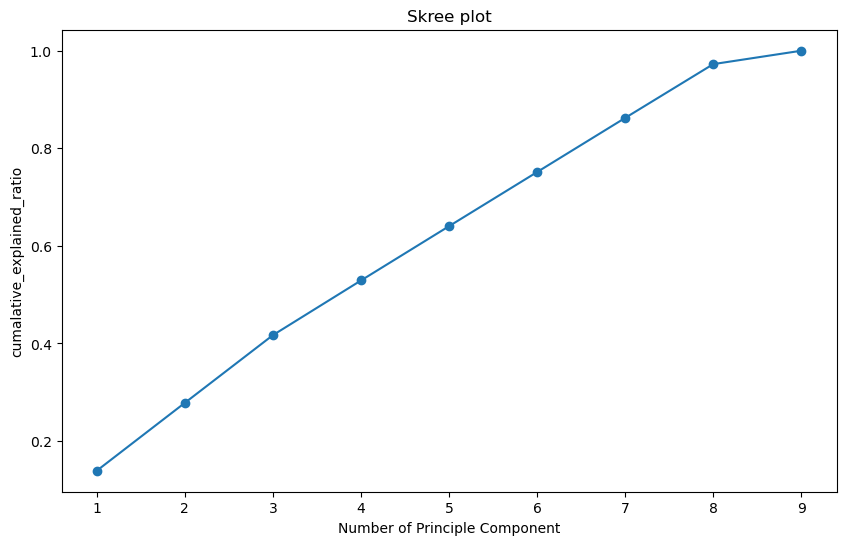

In [100]:
# Calculate the explained variance ratio.
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumalative_explained_ratio = np.cumsum(explained_variance_ratio)

# plot the skree plot
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cumalative_explained_ratio) + 1), cumalative_explained_ratio, marker="o")
plt.title("Skree plot")
plt.xlabel("Number of Principle Component")
plt.ylabel("cumalative_explained_ratio")

 ##### 8 out of 9 principal components (PCs) capture approximately 98% of the variance of the data. Therefore, I will select 8 PCs for further analysis.

In [102]:
pca = PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [103]:
x_train_pca.shape,x_test_pca.shape

((70000, 8), (30000, 8))

In [104]:
Algorithms=[
    LogisticRegression(n_jobs=-1,random_state=42),
    DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=2,min_samples_leaf=4,max_features='log2'
                           ,max_depth=10,random_state=42),
    RandomForestClassifier(oob_score=True,n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='log2',
                           max_depth=3,criterion='entropy',random_state=42),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state=42),
    GradientBoostingClassifier(n_estimators=50,loss='exponential',learning_rate=0.2,criterion='squared_error',random_state=42),
    KNeighborsClassifier(weights='uniform',n_neighbors=3),
    XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42),
    SVC(kernel='linear',C=0.1,max_iter=1000,random_state=42)]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in Algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(x_train_pca, y_train)
    y_train_pred = algorithm.predict(x_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.504043,0.503983,0.504043,0.502486,1.263051
1,DecisionTreeClassifier,0.507157,0.550572,0.507157,0.368603,0.856936
2,RandomForestClassifier,0.519529,0.523669,0.519529,0.495040,33.400693
3,GaussianNB,0.505600,0.505607,0.505600,0.501428,0.197717
4,AdaBoostClassifier,0.504443,0.528289,0.504443,0.365366,19.621955
5,GradientBoostingClassifier,0.535557,0.537558,0.535557,0.528468,23.001870
6,KNeighborsClassifier,0.748657,0.748658,0.748657,0.748657,8.731369
7,XGBClassifier,0.544871,0.545565,0.544871,0.542772,0.570523
8,SVC,0.502929,0.502999,0.502929,0.502502,16.568491


In [108]:
# Initialize the results dictionary for training data
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in Algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(x_train_pca, y_train)
    y_train_pred = algorithm.predict(x_test_pca)

    accuracy = accuracy_score(y_test, y_train_pred)
    precision = precision_score(y_test, y_train_pred, average='weighted')
    recall = recall_score(y_test, y_train_pred, average='weighted')
    f1 = f1_score(y_test, y_train_pred, average='weighted')

    
    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    results_test['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_test = pd.DataFrame(results_test)
df_test

C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rajvi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503633,0.503159,0.503633,0.502126,1.270748
1,DecisionTreeClassifier,0.504667,0.499567,0.504667,0.365883,1.033925
2,RandomForestClassifier,0.506533,0.505367,0.506533,0.481962,33.966913
3,GaussianNB,0.503667,0.502901,0.503667,0.499713,0.095313
4,AdaBoostClassifier,0.506000,0.509848,0.506000,0.367540,17.967370
5,GradientBoostingClassifier,0.499233,0.497899,0.499233,0.491395,22.919803
6,KNeighborsClassifier,0.499833,0.499855,0.499833,0.499842,3.535987
7,XGBClassifier,0.505067,0.504491,0.505067,0.502655,0.448845
8,SVC,0.499367,0.499747,0.499367,0.498846,8.009894


##### There's no significant improvement in performance with PCA.

##### `Final Model`: XGBClassifier is the best-performing algorithm on both the training and test data, using 9 variables, 4 variables, or PCA. It has the highest accuracy, precision, recall, and F1-score on all three. Therefore, I will build the final model using XGBoost Classifier using 9 variables.

### `Final Model: XGBoost Using 9 variables`

In [110]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [114]:
X_train.shape, X_test.shape

((70000, 9), (30000, 9))

In [116]:
X_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [118]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler=MinMaxScaler()

X_train[columns_to_scale]=scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale]=scaler.transform(X_test[columns_to_scale])


In [120]:
# Intialize the XGBoost Classifier.

XgbClassifier = XGBClassifier( 
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train fit the model
XgbClassifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [122]:
y_train_pred = XgbClassifier.predict(X_train)
X_test_pred = XgbClassifier.predict(X_test)

# Calculate the metrics for training set.
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred)
train_recall = recall_score(y_train,y_train_pred)
train_f1 = f1_score(y_train,y_train_pred)

# Calculate the metrics for testing set.
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred)
test_recall = recall_score(y_test,y_test_pred) 
test_f1 = f1_score(y_test,y_test_pred)

# create a dataframe for the metrics.
results = pd.DataFrame({
    "Metrics":["accuracy","precision","recall","f1_score"],
    "Train":[train_accuracy,train_precision,train_recall,train_f1],
    "Test":[test_accuracy,test_precision,test_recall,test_f1]
})
results

,Metrics,Train,Test
0,accuracy,0.671286,0.501200
1,precision,0.672974,0.495979
2,recall,0.663880,0.481816
3,f1_score,0.668396,0.488795


### `Hyperparameter Tunning`

Hyperparameters are settings in machine learning algorithms that control how the algorithm works. They are like the knobs and dials on a machine, and they can be adjusted to improve the performance of the algorithm.

In [166]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the hyperparameter tunning.

param_grid ={
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}
# Initialize GridSearchCV with recall as the scoring metric
grid_search=GridSearchCV(estimator=XgbClassifier,param_grid=param_grid,scoring="recall",cv=3,n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

##### According to the problem statement false nagative are more important to reduce.Therefore i selected the recall matrics.

In [174]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = grid_search.predict(X_test)

recall = recall_score(y_test,y_test_pred)
print("Best parameter for the xgb :",grid_search.best_params_)
print("The recall score is :",recall )

Best parameter for the xgb : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
The recall score is : 0.48430765086206895


##### After hyperparameter tuning, the performance of the model did not improve. Hence, I choose XGBoost CLassifier without 

##### hyperparameter tunning and perform cross-validation on it.

### `Cross validation`

* Cross-validation is a technique used to evaluate the performance of a machine learning model. It works by dividing the data into several parts, called folds. The model is then trained on a subset of the data and tested on the remaining folds. This process is repeated several times, and the results are averaged to get an estimate of the model's performance.

* Cross-validation is necessary because it helps us avoid overfitting the model to the training data.

* Cross-validation is a way to make sure that our model is not just memorizing the training data, but that it is actually learning to make accurate predictions on new data.



In [196]:
# cross validation ofr accuracy.
from sklearn.model_selection import cross_val_score

scores=cross_val_score(XgbClassifier,X_train,y_train,cv=4,n_jobs=-1,scoring="accuracy")

print("Cross validation accuracy:",scores)
print()
print("Cross validation mean score:",scores.mean())

Cross validation accuracy: [0.49982857 0.5044     0.50851429 0.50577143]

Cross validation mean score: 0.5046285714285714


In [198]:
scores=cross_val_score(XgbClassifier,X_train,y_train,cv=4,n_jobs=-1,scoring="recall")

print("Cross validation recall:",scores)
print()
print("Cross validation mean score:",scores.mean())

Cross validation recall: [0.49799611 0.49341578 0.49799611 0.50183234]

Cross validation mean score: 0.49781008337171695


### `Finding Optimal Threshold`

In [229]:
# Creating dataframe of probabilities,actual labels, predicted labels for genral check.

probability = XgbClassifier.predict_proba(X_train)

Predicted_labels = XgbClassifier.predict(X_train)

results = pd.DataFrame({"probability":probability[:,1],
                        "Actual_label":y_train,
                        "predicted_labels":Predicted_labels
                        })

results.head(8)

,probability,Actual_label,predicted_labels
76513,0.316192,1,0
60406,0.518901,1,1
27322,0.530688,1,1
53699,0.517615,1,1
65412,0.340506,0,0
14297,0.536467,1,1
15664,0.296076,0,0
49235,0.521051,1,1


# `Model Evaulation (XG Boost)`¶

### `Train & Test Data Metrics`

In [240]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = XgbClassifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.671286,0.671311,0.671271,0.671261
1,Test,0.497367,0.497251,0.497252,0.497232


### `Confusion Matrix`


Confusion matrix is a table that is used to evaluate the performance of a machine learning model. It shows how many instances were correctly classified as positive (true positives), incorrectly classified as positive (false positives), correctly classified as negative (true negatives), and incorrectly classified as negative (false negatives).

In [253]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (XgbClassifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)
print(train_confusion_matrix)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (XgbClassifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

[[23800 11269]
 [11741 23190]]


,Training Set,Test Set
True Positive (%),34.000000,25.686667
True Negative (%),16.098571,24.820000
False Positive (%),16.772857,25.443333
False Negative (%),33.128571,24.050000


### `ROC-AUC Curve`

ROC-AUC curve, or Receiver Operating Characteristic-Area Under Curve, is a graph used in machine learning to measure the performance of a binary classifier. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.



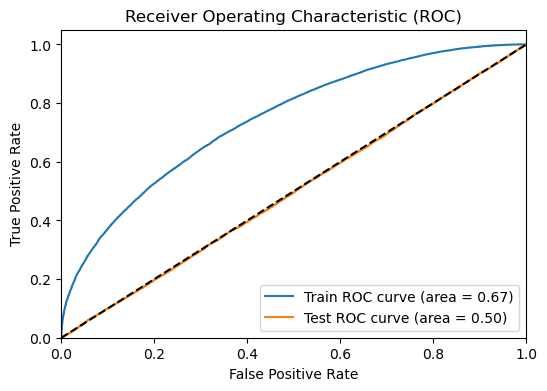

In [258]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = XgbClassifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = XgbClassifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# `Save model in a pickle file`¶

In [274]:
import joblib

joblib.dump(XgbClassifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']

# `Outcome`

#####  We aimed to predict customer churn using machine learning models. Various models were tested, including Logistic 

##### Regression, Random Forest, and XGBoost, with hyperparameter tuning. However, the best model achieved an accuracy of 50%, which is close to random guessing.

* #### Possible Reasons for Low Accuracy:

* ##### The dataset may lack strong predictive features.

* ##### Important customer behavior data ( Transaction history, customer complaints, or engagement levels) may be missing.

While the model did not achieve high accuracy, the project provided valuable insights into data preprocessing, feature engineering, and model tuning.